In [17]:
class Person:
    
    # initailizer
    # __이름__() : 매직메소드, Dundu 메소드, special method
    def __init__(self, name):
        self.name = name
    
    def __str__(self):
        return self.name
    
    # 객체를 함수처럼 사용할 수 있도록 하는 매직매소드.
    # 객체()
    def __call__(self, age):
        print("__call___", self.name, age)
        return age+50
    
    

In [14]:
p = Person('이순신')
p() #__call__() 매직매서드를 호출

__call___ 이순신


In [16]:
p = Person('김영수')
p(30)

__call___ 김영수 30


In [18]:
p = Person('박영희')
r = p(20)
print(r)

__call___ 박영희 20
70


In [19]:
result = Person("박철우")(50)
result

__call___ 박철우 50


100

# Functional API
- Sequential 모델은 각 Layer들의 입력과 출력이 하나라고 가정한다. 그리고 각각의 Layer(입력층, 은닉층, 출력층)들을 차례대로 쌓아 구성한다. 그래서 다양한 구조의 네트워크를 만드는데 한계가 있다.
- 함수형 API를 사용하면 **다중입력, 다중출력, 그래프 형태**의 다양한 형태의 모델을 유연하게 구성할 수 있다.

- Functional API는 직접 텐서들의 입출력을 다룬다. 
- 함수호출 처럼 Layer를 이용하여 입력 텐서(Input Tensor)를 입력 받고 그 결과를 출력 텐서(Output Tensor)로 반환하는 형식으로 모델을 구현한다.


```
input_tensor = Input(shape=(16,))
dense = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(32, activation='sigmoid')(dense)

model = models.Model(input_tensor, output_tensor)
```

## Sequential, Functional API 

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

### Sequential

In [ ]:
출력데이터_1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(입력데이터)

In [ ]:
출력데이터_2 = layers.MaxPooling2D(padding='same')(출력데이터_1)

In [ ]:
layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(출력데이터_1)

In [ ]:
출력데이터_3 = layers.Flatten()(출력데이터_2)

In [21]:
seq_model = keras.Sequential()
seq_model.add(layers.InputLayer(input_shape=(32,32,3)))
seq_model.add(layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
seq_model.add(layers.MaxPooling2D(padding='same'))
seq_model.add(layers.Flatten())
seq_model.add(layers.Dense(units=8, activation='relu'))
seq_model.add(layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# seq_model.predict(image_np)

### Functional

In [24]:
# 레이어들의 구조를 먼저 만든다.
input_tensor = layers.Input(shape=(32,32,3))  #Input Layer는 입력을 지정하지 않는다. (model.predict(인풋))

conv_tensor = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(input_tensor)

mp_tensor = layers.MaxPooling2D(padding="same")(conv_tensor)

flatten_tensor = layers.Flatten()(mp_tensor)

d1_tensor = layers.Dense(units=8, activation='relu')(flatten_tensor)

output_tensor = layers.Dense(units=1, activation='sigmoid')(d1_tensor)

# 모델 정의
fn_model = models.Model(input_tensor, output_tensor)  #입력 tensor, 출력 tensor

# 모델 컴파일, 모델 학습, 평가, 추론 은 동일

In [25]:
fn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 32776     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 33,233
Trainable params: 33,233
Non-trainable params: 0
_________________________________________________________

In [ ]:
# fn_model.predict(img_np)

In [26]:
#  출력 변수들은 통일. 일반적으로 block 단위로 동일한 변수명을 사용.
input_tensor = layers.Input(shape=(32,32,3))  #Input Layer는 입력을 지정하지 않는다. (model.predict(인풋))

x1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(input_tensor)
x1 = layers.MaxPooling2D(padding="same")(x1)

x2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding="same")(x2)


x3 = layers.Flatten()(x2)
x3 = layers.Dense(units=8, activation='relu')(x3)

# 출력레이어
output_tensor = layers.Dense(units=1, activation='sigmoid')(x3)

# 모델 정의
fn_model = models.Model(input_tensor, output_tensor)  #입력 tensor, 출력 tensor

In [28]:
fn_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 8200

In [29]:
# trainable 설정
input_tensor = layers.Input(shape=(32,32,3))  #Input Layer는 입력을 지정하지 않는다. (model.predict(인풋))

conv_layer = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')
conv_layer.trainable = False

x1 = conv_layer(input_tensor) 
x1 = layers.MaxPooling2D(padding="same")(x1)

x2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding="same")(x2)


x3 = layers.Flatten()(x2)
x3 = layers.Dense(units=8, activation='relu')(x3)

# 출력레이어
output_tensor = layers.Dense(units=1, activation='sigmoid')(x3)

# 모델 정의
fn_model = models.Model(input_tensor, output_tensor)  #입력 tensor, 출력 tensor

In [31]:
fn_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 8200

In [32]:
# transfer learning
from tensorflow.keras.applications import VGG16

In [38]:
conv_base = VGG16(include_top=False)
conv_base.trainable=False

In [39]:
input_tensor = layers.Input(shape=(224,224,3))
x = conv_base(input_tensor)
x = layers.GlobalAveragePooling2D()(x)
#출력
output_tensor = layers.Dense(units=1, activation='sigmoid')(x)

model = models.Model(input_tensor, output_tensor)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# model.fit(....)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


## 레이어를 합치는 함수
- concatenate(list, axis=-1)
    - 레이어들을 합친다
    - list: 합칠 레이어들을 리스트에 묶어 전달
    - axis: 합칠 기준축. (기본값: -1 : 마지막 축기준)
- add(list), substract(list), multiply(list)
    - 같은 index의 값들을 계산해서(더하기, 빼기, 곱하기) 하나의 레이어로 만든다.
    - list: 합칠 레이어들을 리스트에 묶어 전달

In [67]:
# ResNet 의 Residual Block 
input_tensor = layers.Input(shape=(32,32,3))

x = layers.Conv2D(filters=64, kernel_size=3, padding='same')(input_tensor)
#-----residual block
x1 = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.ReLU()(x1)

x2 = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x1)
x2 = layers.BatchNormalization()(x2)

# input_tensor(입력), x2(block의 출력)을 더한다.
add_result = layers.add([x, x2])  

output_tensor = layers.ReLU()(add_result)

rb_model = models.Model(input_tensor, output_tensor)

In [44]:
rb_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 64)   1792        input_15[0][0]                   
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 32, 32, 64)   36928       conv2d_10[0][0]                  
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 32, 32, 64)   256         conv2d_11[0][0]                  
____________________________________________________________________________________________

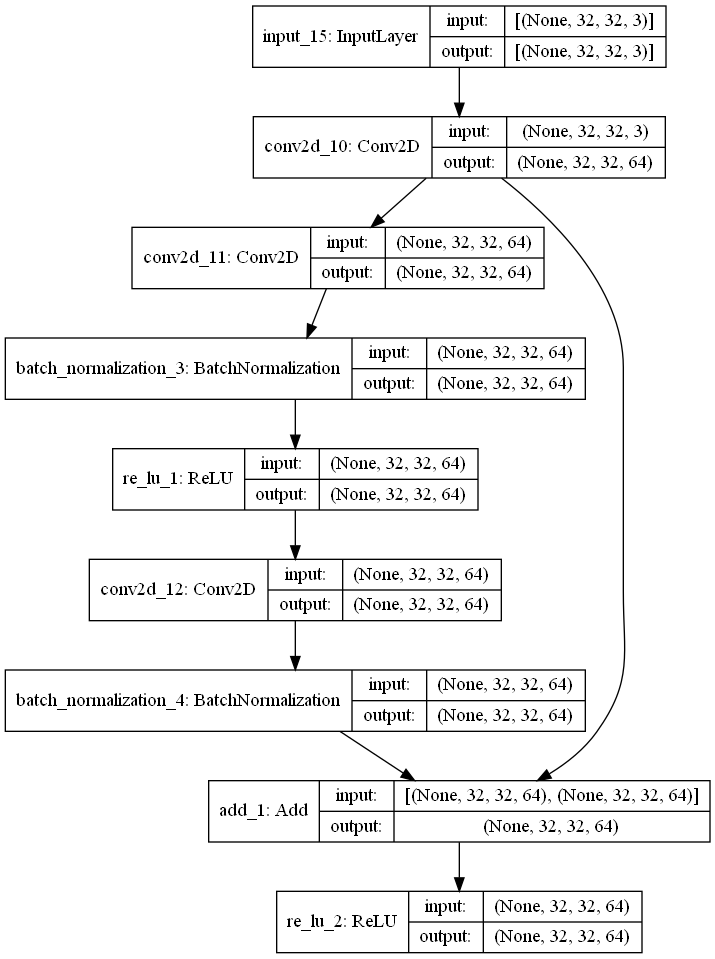

In [45]:
keras.utils.plot_model(rb_model, show_shapes=True)

### 다중 출력 모델
- 가정
    - iris 데이터셋에서 꽃받침의 너비와 높이로 꽃입의 너비, 높이, 꽃 종류를 예측하는 모델
    - 출력결과가 3개가 나와야 한다.
- X: 꽃받침 너비, 높이
- y: 꽃잎 너비, 높이, 꽃 종류

In [46]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [47]:
# 꽃잎 너비: y1, 꽃잎 높이: y2, 종류: y3
# X: [꽃받침 너비, 높이]

y1 = X[:, 2]
y2 = X[:, 3]
y3 = y

X = X[:, [0,1]]
X.shape, y1.shape, y2.shape, y3.shape

((150, 2), (150,), (150,), (150,))

In [49]:
# 모델 정의 - 입력: X 출력: y1, y2, y3  (다중출력)
input_tensor = layers.Input(shape=(2, ))
# hidden
x = layers.Dense(units=16, activation='relu')(input_tensor)
x = layers.Dense(units=8, activation='relu')(x)

# 출력 layer => 3
output_1 = layers.Dense(units=1, name='petal_width_output')(x) #꽃잎 너비(연속형): 회귀 - units:1, activation: None
output_2 = layers.Dense(units=1, name='petal_length_output')(x) #꽃잎 길이(연속형)
output_3 = layers.Dense(units=3, activation='softmax', name='species_output')(x) #종류(범주형-다중분류): units: class개수, activation: softmax

# o = layers.concatenate([o1, o2, o3])
# layers.Dense(...)(o)

# 모델
model = models.Model(input_tensor, [output_1, output_2, output_3])  #input/output이 여러개일 경우 List로 묶어서 전달.

In [50]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 16)           48          input_16[0][0]                   
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 8)            136         dense_10[0][0]                   
__________________________________________________________________________________________________
petal_width_output (Dense)      (None, 1)            9           dense_11[0][0]                   
____________________________________________________________________________________________

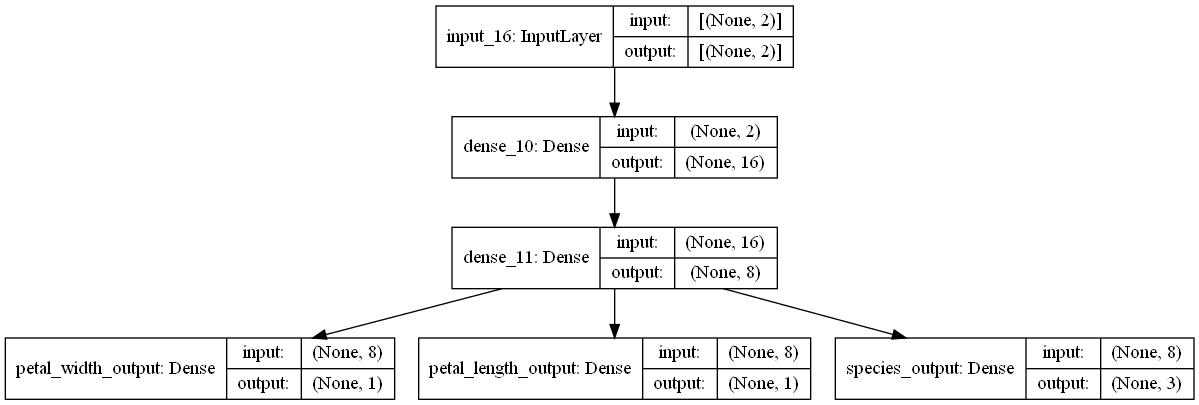

In [51]:
keras.utils.plot_model(model, show_shapes=True)

In [55]:
# 컴파일
model.compile(optimizer='adam',
              loss=["mse", "mse", "sparse_categorical_crossentropy"]) #sparse_categorical_crossentropy: y(정답)을 내부적으로 원핫인코딩 처리후 오차계산을 해준다.

# 출력(예측) 결과가 3개에 대한 각각의 loss 함수를 순서대로 리스트로 묶어서 전달.
# 3개의 오차를 더해서 total loss를 계산한 뒤 total loss를 기반으로 역전파해서 파라미터들을 업데이트 한다.

In [56]:
# 학습
hist= model.fit(x=X, 
              y=[y1, y2, y3], 
              epochs=100, 
              validation_split=0.1)

Epoch 1/100
5/5 [==============================] - 1s 86ms/step - loss: 35.1354 - petal_width_output_loss: 27.8650 - petal_length_output_loss: 5.6365 - species_output_loss: 1.6339 - val_loss: 59.8622 - val_petal_width_output_loss: 45.8096 - val_petal_length_output_loss: 11.3481 - val_species_output_loss: 2.7045
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 32.9185 - petal_width_output_loss: 26.3052 - petal_length_output_loss: 5.0683 - species_output_loss: 1.5451 - val_loss: 56.4796 - val_petal_width_output_loss: 43.6326 - val_petal_length_output_loss: 10.3226 - val_species_output_loss: 2.5244
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 30.8771 - petal_width_output_loss: 24.8966 - petal_length_output_loss: 4.5098 - species_output_loss: 1.4706 - val_loss: 53.2652 - val_petal_width_output_loss: 41.5864 - val_petal_length_output_loss: 9.3233 - val_species_output_loss: 2.3555
Epoch 4/100
5/5 [==============================] - 0s 14ms/ste

5/5 [==============================] - 0s 17ms/step - loss: 11.3992 - petal_width_output_loss: 9.6786 - petal_length_output_loss: 0.5593 - species_output_loss: 1.1614 - val_loss: 21.4600 - val_petal_width_output_loss: 18.3874 - val_petal_length_output_loss: 1.3729 - val_species_output_loss: 1.6997
Epoch 28/100
5/5 [==============================] - 0s 16ms/step - loss: 11.0254 - petal_width_output_loss: 9.3176 - petal_length_output_loss: 0.5446 - species_output_loss: 1.1633 - val_loss: 20.7506 - val_petal_width_output_loss: 17.7621 - val_petal_length_output_loss: 1.2820 - val_species_output_loss: 1.7065
Epoch 29/100
5/5 [==============================] - 0s 17ms/step - loss: 10.6457 - petal_width_output_loss: 8.9504 - petal_length_output_loss: 0.5306 - species_output_loss: 1.1647 - val_loss: 20.0474 - val_petal_width_output_loss: 17.1330 - val_petal_length_output_loss: 1.2027 - val_species_output_loss: 1.7118
Epoch 30/100
5/5 [==============================] - 0s 12ms/step - loss: 10.2

5/5 [==============================] - 0s 9ms/step - loss: 3.9112 - petal_width_output_loss: 2.2907 - petal_length_output_loss: 0.4718 - species_output_loss: 1.1487 - val_loss: 6.4763 - val_petal_width_output_loss: 4.1615 - val_petal_length_output_loss: 0.7731 - val_species_output_loss: 1.5416
Epoch 54/100
5/5 [==============================] - 0s 14ms/step - loss: 3.7999 - petal_width_output_loss: 2.1824 - petal_length_output_loss: 0.4703 - species_output_loss: 1.1471 - val_loss: 6.1250 - val_petal_width_output_loss: 3.8538 - val_petal_length_output_loss: 0.7587 - val_species_output_loss: 1.5124
Epoch 55/100
5/5 [==============================] - 0s 13ms/step - loss: 3.6949 - petal_width_output_loss: 2.0810 - petal_length_output_loss: 0.4692 - species_output_loss: 1.1446 - val_loss: 5.8037 - val_petal_width_output_loss: 3.5738 - val_petal_length_output_loss: 0.7466 - val_species_output_loss: 1.4833
Epoch 56/100
5/5 [==============================] - ETA: 0s - loss: 3.6133 - petal_widt

5/5 [==============================] - 0s 15ms/step - loss: 3.0806 - petal_width_output_loss: 1.5534 - petal_length_output_loss: 0.4062 - species_output_loss: 1.1210 - val_loss: 3.6832 - val_petal_width_output_loss: 1.5593 - val_petal_length_output_loss: 0.8480 - val_species_output_loss: 1.2760
Epoch 80/100
5/5 [==============================] - 0s 9ms/step - loss: 3.0711 - petal_width_output_loss: 1.5485 - petal_length_output_loss: 0.4028 - species_output_loss: 1.1199 - val_loss: 3.6767 - val_petal_width_output_loss: 1.5543 - val_petal_length_output_loss: 0.8448 - val_species_output_loss: 1.2776
Epoch 81/100
5/5 [==============================] - 0s 14ms/step - loss: 3.0622 - petal_width_output_loss: 1.5440 - petal_length_output_loss: 0.3994 - species_output_loss: 1.1188 - val_loss: 3.6135 - val_petal_width_output_loss: 1.5310 - val_petal_length_output_loss: 0.8185 - val_species_output_loss: 1.2640
Epoch 82/100
5/5 [==============================] - 0s 12ms/step - loss: 3.0532 - petal

In [59]:
# tf.data.Dataset.from_tensor_slices((X, (y1, y2, y3)))

<TensorSliceDataset shapes: ((2,), ((), (), ())), types: (tf.float64, (tf.float64, tf.float64, tf.int32))>

In [63]:
# 추론
import numpy as np
new_data = X[0]
new_data = new_data[np.newaxis, ...]
new_data

array([[5.1, 3.5]])

In [64]:
pred = model.predict(new_data)
pred

[array([[3.0563126]], dtype=float32),
 array([[0.9814011]], dtype=float32),
 array([[0.31457844, 0.40909502, 0.27632654]], dtype=float32)]

In [65]:
print(y1[0])
print(y2[0])
print(y3[0])

1.4
0.2
0


## 다중 입력 모델
- 가정 
    - IRIS 꽃 데이터 + 꽃의 사진을 입력해서 꽃의 종류를 예측한다.
- X: 꽃 데이터, 꽃 사진
- y: 꽃 종류

In [71]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [72]:
# iris 사진 대신 mnist 사진을 사용 - 6만개중 150개만 추출
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_img = X_train[:150]
X_train.shape, X_img.shape

((60000, 28, 28), (150, 28, 28))

In [74]:
# input을 2개 받는 모델 구현
iris_info_tensor = layers.Input(shape=(4,)) #꽃정보 input
x1 = layers.Dense(units=32, activation='relu')(iris_info_tensor)
x1 = layers.Dense(units=16, activation='relu')(x1)

iris_img_tensor = layers.Input(shape=(28, 28, 1))

x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same',  activation='relu')(iris_img_tensor)
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same',  activation='relu')(x2)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x2)
x3 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x3)
x3 = layers.MaxPooling2D(padding='same')(x3)
x3 = layers.GlobalAveragePooling2D()(x3)

# x1, x3를 합치기. - info, img 두개 정보를 합치는 것.
x4 = layers.concatenate([x1, x3])

output_tensor = layers.Dense(units=3, activation='softmax')(x4)

model = models.Model([iris_info_tensor, iris_img_tensor] , output_tensor)


In [75]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 28, 28, 32)   320         input_22[0][0]                   
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 28, 28, 32)   9248        conv2d_23[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 14, 14, 32)   0           conv2d_24[0][0]                  
____________________________________________________________________________________________

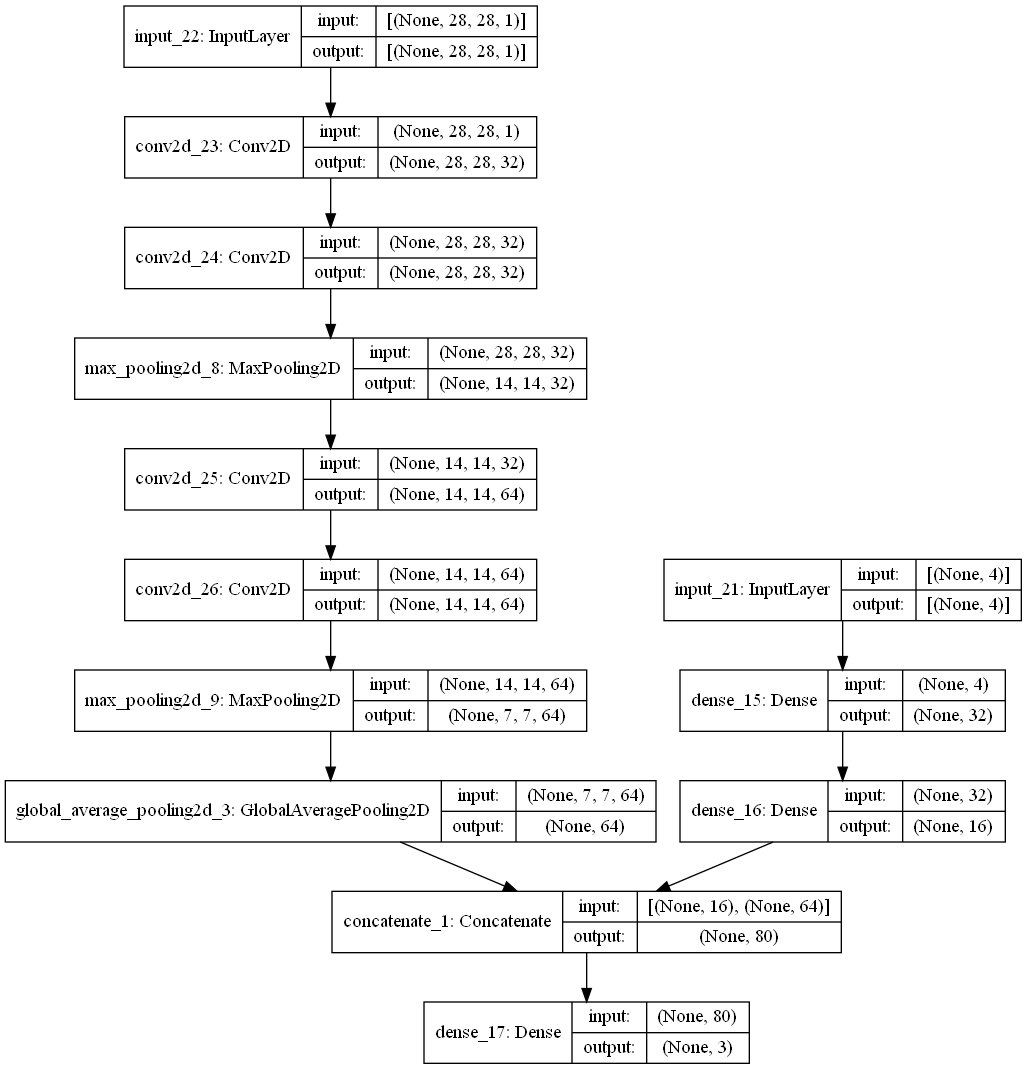

In [76]:
keras.utils.plot_model(model, show_shapes=True)

In [77]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(x=[X, X_img],  #입력이 2개이므로 순서대(모델에 layer추가한 순서)로 리스트로 묶어서 전달.
          y=y, 
          epochs=2,
          validation_split=0.1)

Epoch 1/2
5/5 [==============================] - 2s 187ms/step - loss: 7.4301 - accuracy: 0.3556 - val_loss: 7.9059 - val_accuracy: 0.0000e+00
Epoch 2/2
5/5 [==============================] - 1s 127ms/step - loss: 2.3196 - accuracy: 0.2667 - val_loss: 1.1979 - val_accuracy: 0.0000e+00


In [80]:
tf.data.Dataset.from_tensor_slices(((X, X_img), y))

<TensorSliceDataset shapes: (((4,), (28, 28)), ()), types: ((tf.float64, tf.uint8), tf.int32)>